# Final Homework.  
- Babatunde John Olanipekun.  

## About the dataset.  
- We were not provided much information on the source of the dataset.  
- But we know that 'y' is the target response and it is a binary attribute.  
    - So this will be a classification task.  

## Approach.  
- We will conduct usual data preprocessing.  
- If we have more than 100,000 records (len(def)), we will split the data to train-test.  
- Fit the data to logistic regression, random forest and XGBoost.  


## Evaluation.  
- We will attempt to improve the worst model by 10% by further tuning the estimators.  
- The target is > 90% accuracy on these estimators.  

### Cost of prediction.  
- False negative: 0 if 1 = USD1500.     
- False positive: 1 if 0 = USD500.  


In [1]:
import pandas as pd
import os

In [2]:
#Confirm the working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Quantifying the world'

In [3]:
path = r'.\final_project(5).csv'

In [4]:
df = pd.read_csv(path)

In [5]:
# it is helpful to snoop into the dataset. 
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [7]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


The mean and median in most variable are quite close which suggests that these variables are nearly normally distributed.  
So we may not require any normalization step.  

In [8]:
import copy
df1 = copy.deepcopy(df)

In [9]:
df1.iloc[:,32:].head(n=20)

,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
5,-0.01%,0.962813,2.934661,-2.725477,0.656132,$-196.45,-6.555903,6.014648,3.091261,-7.250310,6.402343,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0
6,-0.01%,1.487652,19.546647,-4.279037,-0.000735,$-241.04,-14.102935,-6.139318,-8.818327,-15.596731,-7.779833,-1.153986,-1.081095,-0.538983,1.573406,2.102627,-2.966103,4.604337,1
7,0.01%,0.467617,10.537118,0.061739,0.010240,$621.35,17.885994,11.162321,-2.479899,19.780494,-3.711105,-3.134008,-5.805255,0.966762,6.639034,6.258786,1.272556,13.186184,1
8,-0.03%,-0.704558,-9.100507,6.544267,-1.951658,$-301.89,-23.704439,7.594268,7.576010,-26.215235,0.330604,-2.015631,2.219910,0.533815,-2.627660,0.182319,3.140230,14.495677,0
9,0.01%,2.792562,-5.347096,1.084512,1.479771,$-484.09,17.421890,-0.302757,-9.152182,19.267232,-0.675888,-2.560935,1.326146,0.444997,-20.942887,-3.141996,-1.608473,7.169219,1


### Inspecting real data types 

- x24 = categorical
- x29 = categorical
- x30 = categorical
- x32 = numerical but it has '%' char that needs to be removed.
- x37 = numerical but it has '$' that needs to be removed.
- y is the response variable but it needs to be converted to categorical.

In [10]:
# we have a binary response that we can convert to categorical
df1['y'] = df1['y'].astype("category") 

In [11]:
cols=['x24', 'x29', 'x30']
for col in df1:
    if col in cols:
    #if df1[col].dtypes in ['object']:
        df1[col] = df1[col].astype("category") 

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x0      159974 non-null  float64 
 1   x1      159975 non-null  float64 
 2   x2      159962 non-null  float64 
 3   x3      159963 non-null  float64 
 4   x4      159974 non-null  float64 
 5   x5      159963 non-null  float64 
 6   x6      159974 non-null  float64 
 7   x7      159973 non-null  float64 
 8   x8      159979 non-null  float64 
 9   x9      159970 non-null  float64 
 10  x10     159957 non-null  float64 
 11  x11     159970 non-null  float64 
 12  x12     159964 non-null  float64 
 13  x13     159969 non-null  float64 
 14  x14     159966 non-null  float64 
 15  x15     159965 non-null  float64 
 16  x16     159974 non-null  float64 
 17  x17     159973 non-null  float64 
 18  x18     159960 non-null  float64 
 19  x19     159965 non-null  float64 
 20  x20     159962 non-null  f

### Remove '%'  and '\\$' from affected columns.     

In [13]:
df1['x32'] = df1['x32'].str.rstrip('%').astype('float64')
df1['x37'] = df1['x37'].str.lstrip('$').astype('float64')

In [14]:
df1.iloc[:,27:40].head(n=20)

,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39
0,1.005131,-18.473784,July,tuesday,-3.851669,0.00,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148
1,0.751086,3.749377,Aug,wednesday,1.391594,-0.02,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012
2,4.171088,11.522448,July,wednesday,-3.262082,-0.01,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585
3,9.215569,30.595226,July,wednesday,-2.285241,0.01,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060
4,1.811182,-4.094084,July,tuesday,0.921047,0.01,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798
5,14.162735,5.567174,Aug,wednesday,1.168850,-0.01,0.962813,2.934661,-2.725477,0.656132,-196.45,-6.555903,6.014648
6,-9.566602,9.618410,Jun,wednesday,-0.771455,-0.01,1.487652,19.546647,-4.279037,-0.000735,-241.04,-14.102935,-6.139318
7,-4.372534,-5.655852,Aug,wednesday,-2.823480,0.01,0.467617,10.537118,0.061739,0.010240,621.35,17.885994,11.162321
8,-1.952634,19.140589,May,wednesday,-3.134230,-0.03,-0.704558,-9.100507,6.544267,-1.951658,-301.89,-23.704439,7.594268
9,3.231103,3.094954,Jun,wednesday,-2.150637,0.01,2.792562,-5.347096,1.084512,1.479771,-484.09,17.421890,-0.302757


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x0      159974 non-null  float64 
 1   x1      159975 non-null  float64 
 2   x2      159962 non-null  float64 
 3   x3      159963 non-null  float64 
 4   x4      159974 non-null  float64 
 5   x5      159963 non-null  float64 
 6   x6      159974 non-null  float64 
 7   x7      159973 non-null  float64 
 8   x8      159979 non-null  float64 
 9   x9      159970 non-null  float64 
 10  x10     159957 non-null  float64 
 11  x11     159970 non-null  float64 
 12  x12     159964 non-null  float64 
 13  x13     159969 non-null  float64 
 14  x14     159966 non-null  float64 
 15  x15     159965 non-null  float64 
 16  x16     159974 non-null  float64 
 17  x17     159973 non-null  float64 
 18  x18     159960 non-null  float64 
 19  x19     159965 non-null  float64 
 20  x20     159962 non-null  f

**The dataset contains 50 attributes: 4 categorical and 46 numerical represented as float.**

## check for duplicated rows.  
- None found in this dataset.


In [18]:
duplicate = df1[df1.duplicated()]
duplicate

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y


## Missing values. 
The missing values are much less than 1% of the entire dataset.  
So we can drop them.  



In [19]:
df1.dropna(inplace=True)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x0      158392 non-null  float64 
 1   x1      158392 non-null  float64 
 2   x2      158392 non-null  float64 
 3   x3      158392 non-null  float64 
 4   x4      158392 non-null  float64 
 5   x5      158392 non-null  float64 
 6   x6      158392 non-null  float64 
 7   x7      158392 non-null  float64 
 8   x8      158392 non-null  float64 
 9   x9      158392 non-null  float64 
 10  x10     158392 non-null  float64 
 11  x11     158392 non-null  float64 
 12  x12     158392 non-null  float64 
 13  x13     158392 non-null  float64 
 14  x14     158392 non-null  float64 
 15  x15     158392 non-null  float64 
 16  x16     158392 non-null  float64 
 17  x17     158392 non-null  float64 
 18  x18     158392 non-null  float64 
 19  x19     158392 non-null  float64 
 20  x20     158392 non-null  f

In [21]:
# we lost ~1% to dropping the missung values.
# this is a'big' dataset so the impact of the removing the missing NAs will be minimal.
1 - (158392/160000)

0.010050000000000003

## Class imbalance.  
- We need to check for class imbalance.  
    - As we can see below, class imbalance is not a huge problem given a ~60/40 ratio in distribution with respect to the target variable.   

In [22]:
df1['y'].value_counts(normalize=True)

0    0.598805
1    0.401195
Name: y, dtype: float64

## Outlier  
- Checking for significant oultier to see if I need to standardize any features. 
    - The box method of the matplotlib library will be used to make univariate plots.  
    - There is no significant outlier in any of the dataset.  
    - But we will still use robust scaler to standardize our dataset.  


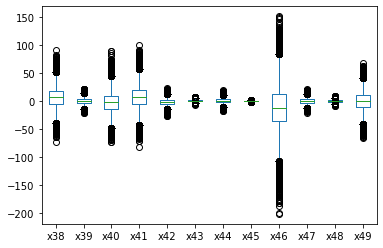

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
df1.iloc[:,38:].plot(kind='box')
plt.show()

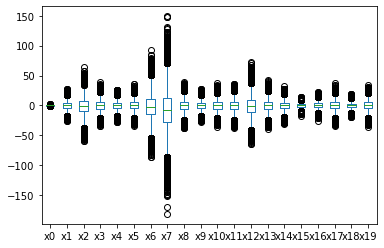

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
df1.iloc[:,:20].plot(kind='box')
plt.show()

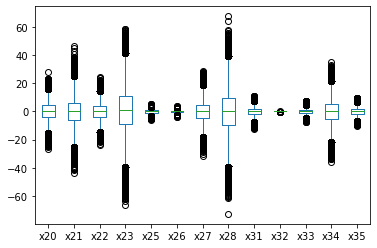

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
df1.iloc[:,20:36].plot(kind='box')
plt.show()

### Data distribution.  
Looking the boxplots, it is clear that all the attributes do not contain very extreme outliers and are normally distributed.  

## Onehotencoding  for features.  
- We will encode the categorical features as 0,1.
  

In [29]:
#Remove the target response from the predictor attributes. 
#Ensure the shape is the same as that of the main dataset.  
y = df1.y
y.shape

(158392,)

In [30]:
#from sklearn.preprocessing import RobustScaler
#import numpy as np
df2 =copy.deepcopy(df1) 
for col in df1:
    if df1[col].dtype.name in ['category']:
        tmp_df = pd.get_dummies(df1[col], prefix=col) #Onehot encoding.  
        df2 = pd.concat((df2,tmp_df),axis=1)
        #df1[col]= trans.fit_transform(df[col])

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 73 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   x0             158392 non-null  float64 
 1   x1             158392 non-null  float64 
 2   x2             158392 non-null  float64 
 3   x3             158392 non-null  float64 
 4   x4             158392 non-null  float64 
 5   x5             158392 non-null  float64 
 6   x6             158392 non-null  float64 
 7   x7             158392 non-null  float64 
 8   x8             158392 non-null  float64 
 9   x9             158392 non-null  float64 
 10  x10            158392 non-null  float64 
 11  x11            158392 non-null  float64 
 12  x12            158392 non-null  float64 
 13  x13            158392 non-null  float64 
 14  x14            158392 non-null  float64 
 15  x15            158392 non-null  float64 
 16  x16            158392 non-null  float64 
 17  x17       

In [32]:
#Drop the encoded variables. 
df2.drop(columns=['x24', 'x29', 'x30', 'y', 'y_0','y_1'], inplace=True)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 67 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   x0             158392 non-null  float64
 1   x1             158392 non-null  float64
 2   x2             158392 non-null  float64
 3   x3             158392 non-null  float64
 4   x4             158392 non-null  float64
 5   x5             158392 non-null  float64
 6   x6             158392 non-null  float64
 7   x7             158392 non-null  float64
 8   x8             158392 non-null  float64
 9   x9             158392 non-null  float64
 10  x10            158392 non-null  float64
 11  x11            158392 non-null  float64
 12  x12            158392 non-null  float64
 13  x13            158392 non-null  float64
 14  x14            158392 non-null  float64
 15  x15            158392 non-null  float64
 16  x16            158392 non-null  float64
 17  x17            158392 non-nul

## Train-test split.  
- The new dataset now has 67 columns after the onehotencoding.  
- We will kep 15% as test set to evaluate our model.  
    - It is not essential to stratify sampling because the classes are nearly balanced. 

In [35]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(df2, y, test_size=0.15,random_state=42, stratify = y)


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler

## Normalize, Scale.  
- The idea is to normalize data that are not normally distributed and standardize/scale data so that all the attributes have a mean = 0 and standard deviation = 1. 
- However, we do not want to accidentally use the testing data to determine the mean and std (this would be snooping).  
- I found this analogy on stackexchange: 
    - https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data    
    - https://stackoverflow.com/questions/63037248/is-it-correct-to-use-a-single-standardscaler-before-splitting-data    


In [39]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(train)
X_test = scaler.transform(test)

In [44]:
train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
102251,-0.092518,0.065540,-8.106073,-5.063874,10.995301,-0.831157,-11.785621,-44.656776,6.018197,-5.250462,...,0,0,0,0,0,0,0,0,0,1
144768,-0.144375,4.481236,13.274440,-13.313492,-11.828845,-3.760655,19.300038,-49.196581,-1.577703,-1.330635,...,0,0,0,0,0,0,0,0,0,1
28775,-0.055396,0.710109,-9.349981,1.199072,7.635552,7.682742,-13.594170,37.831414,-8.713023,-0.987806,...,0,0,0,0,0,0,0,1,0,0
38543,0.177142,-0.425440,10.100688,12.389237,-2.125743,-7.147561,14.685641,-9.179316,0.808538,2.184415,...,0,0,0,0,0,1,0,0,0,0
573,0.272088,2.908309,-18.353995,-0.947516,8.802744,0.016342,-26.685329,-33.253244,-7.452920,11.121937,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58335,0.161087,-12.813000,-14.617766,1.134675,-3.766302,-7.813302,-21.253134,7.482838,-1.000690,-4.073181,...,0,0,0,0,0,0,0,0,0,1
151696,-0.136296,2.995620,25.755322,-2.776815,-3.862744,10.969033,37.446302,-58.721994,13.827378,3.135855,...,0,0,0,0,0,0,0,0,0,1
119184,0.357479,9.463297,9.590006,3.356048,-2.428666,0.000246,13.943149,1.351641,12.627159,2.894304,...,0,0,0,0,0,0,0,0,0,1
16311,0.273437,9.988583,-11.006676,5.655793,10.364243,3.684702,-16.002879,11.025653,-2.406340,2.051181,...,0,0,0,0,0,0,0,0,1,0


In [47]:
X_train.shape

(134633, 67)

In [51]:
X_train

array([[-0.24719257,  0.00819287, -0.52295327, ..., -0.47455887,
        -0.46060439,  0.75880117],
       [-0.38685367,  0.70486456,  1.08708285, ..., -0.47455887,
        -0.46060439,  0.75880117],
       [-0.14721659,  0.10988759, -0.61662441, ...,  2.10722011,
        -0.46060439, -1.31786829],
       ...,
       [ 0.96473247,  1.49089248,  0.80963062, ..., -0.47455887,
        -0.46060439,  0.75880117],
       [ 0.73839317,  1.57376776, -0.74137995, ..., -0.47455887,
         2.17106049, -1.31786829],
       [-2.52910964, -0.08939534, -1.9340123 , ..., -0.47455887,
        -0.46060439,  0.75880117]])

## The feature names
- Feature names are lost after applying the standard scaler.  
- For better explainability, we retrieve them back.  

In [52]:
train_scaled_features = pd.DataFrame(X_train, index=train.index, columns=train.columns)
test_scaled_features = pd.DataFrame(X_test, index=test.index, columns=test.columns)

In [54]:
#Sanity checks.

train_scaled_features
#The same as we had for X_train so that is expected.

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
102251,-0.247193,0.008193,-0.522953,-0.627133,1.719409,-0.110595,-0.522953,-1.210604,0.678020,-0.825505,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,-0.474559,-0.460604,0.758801
144768,-0.386854,0.704865,1.087083,-1.650002,-1.852141,-0.492670,1.087083,-1.359340,-0.175212,-0.208328,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,-0.474559,-0.460604,0.758801
28775,-0.147217,0.109888,-0.616624,0.149410,1.193672,0.999819,-0.616624,1.491931,-0.976708,-0.154350,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,2.107220,-0.460604,-1.317868
38543,0.479052,-0.069270,0.848087,1.536878,-0.333788,-0.934403,0.848087,-0.048267,0.092830,0.345116,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,16.735321,-0.054861,-0.474559,-0.460604,-1.317868
573,0.734758,0.456701,-1.294662,-0.116746,1.376315,-0.000061,-1.294662,-0.836994,-0.835163,1.752329,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,-0.474559,-0.460604,0.758801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58335,0.435812,-2.023676,-1.013309,0.141425,-0.590504,-1.021231,-1.013309,0.497630,-0.110397,-0.640142,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,-0.474559,-0.460604,0.758801
151696,-0.365096,0.470476,2.026942,-0.343560,-0.605596,1.428429,2.026942,-1.671419,1.555209,0.494920,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,-0.474559,-0.460604,0.758801
119184,0.964732,1.490892,0.809631,0.416853,-0.381189,-0.002160,0.809631,0.296755,1.420391,0.456888,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,-0.474559,-0.460604,0.758801
16311,0.738393,1.573768,-0.741380,0.701998,1.620661,0.478380,-0.741380,0.613702,-0.268291,0.324139,...,-0.088573,-0.398336,-0.045652,-0.122797,-0.269273,-0.059754,-0.054861,-0.474559,2.171060,-1.317868


## Fit and Predict.  
- we will do cross validation on the entire dataset to evaluate models.  
    - We will follow up with fit() on the train set and predict on the test set
- We will use a custom function to evaluate Logistic Regression, Random Forest, XGBoost models on the dataset.  
- We will use AUC Mean. 
    - The predicted y values will be estimated and tabulated as classification report.  
    

In [55]:
##Classification begins from here
###Logistic Regression Classifier
from sklearn.model_selection import RandomizedSearchCV
def model_clf(train, test, y_train, y_test, clf):
    """
    For this model training and prediction, we will do cross validation on the train to evaluate models.
    We will follow up with fit() on the train set and predict on the test set
    """
    if clf=='lr':
        #Define the estimator object
        #Here is logistic regression with l2 normalization. 
        #We do not do much tuning on this one yet.  
        clf = LogisticRegression(penalty='l2', max_iter=1000, class_weight='balanced', C=1, random_state=42)
        
        print('working on Logistic regression')
        #We cross validate for AUC score metric and return the mean scores.
        #The higher the Area Under The Curve value the better the model.  
        auc_scores = cross_val_score(clf, train, y_train,scoring='roc_auc', cv=10, n_jobs=-1)
        auc_mean = np.mean(auc_scores)
        auc_stdev = np.std(auc_scores)
        clf_cl = clf.fit(train, y_train)
        clf_pred = clf_cl.predict(test)
        
        #Assign column names to the feature importance 'scores'
        feature_imp = list(zip(train.columns, clf_cl.coef_[0])) #we use this attribute to assess feature importance.
        
        #Here is the classification report that has accuracy, precision and recall.
        class_rep = classification_report(y_test, clf_pred)
        #return [class_rep, auc_mean, auc_stdev, feature_imp]
        return [class_rep, clf_pred, auc_mean, auc_stdev, feature_imp]
        
###RandomForest Classifier############################################
    elif clf=='rnd_clf':
        #Define the estimator object
        clf = RandomForestClassifier(class_weight='balanced', random_state=123)
        print('Working on RandomForest') 
        
         #We cross validate for AUC score metric and return the mean scores.
        auc_scores = cross_val_score(clf, train, y_train,scoring='roc_auc', cv=10, n_jobs=-1)
        auc_mean = np.mean(auc_scores)
        auc_stdev = np.std(auc_scores)
        clf_cl = clf.fit(train, y_train)
        clf_pred = clf_cl.predict(test)
        
        #Here is the classification report that has accuracy, precision and recall.
        class_rep = classification_report(y_test, clf_pred)
        
         #Assign column names to the feature importance 'scores'
        feature_imp = list(zip(train.columns, clf_cl.feature_importances_)) #we use this attribute to assess feature importance.
        return [class_rep, clf_pred, auc_mean, auc_stdev, feature_imp]
        
######XGBoost Classifier#################################################        
    elif clf =='xgbr':
#####Start with a randomsearch across parameter space##############
        params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]
            
                  
                 }
##We use the sci-kit learning api for the parameter search but final fit will be done with learning API
        print('Starting XGB grid search')
        xgb_clf = xgb.XGBClassifier(seed=123)
        clf1 = RandomizedSearchCV(estimator=xgb_clf,
                         param_distributions=params,
                         scoring='roc_auc',
                         n_iter=25,
                         verbose=1)
        search = clf1.fit(train, y_train)
        
#Selects the best parameters. 
#Note that XGBoost.train needs objective and number of target classes
#We add those parameters to the dict output of best_params_
        params = search.best_params_
        params['objective']= 'binary:logistic'
        #params['num_class']= 2
        
###Here we fit the bestparams to the learning API xgb.train()   
        dtrain = xgb.DMatrix(train, y_train)
        dtest=xgb.DMatrix(test, y_test)
        evallist=[(dtest, 'eval'), (dtrain, 'train')]
        num_round=500
        
        #We cross validate for AUC score metric and return the mean scores. 10 folds
        my_model = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=200)
        feature_imp = my_model.get_score(importance_type='gain')
        xgb_cv = xgb.cv(dtrain=dtrain, params=params,
                            nfold=10, metrics={'auc'},
                            seed=20, num_boost_round=1000,
                        verbose_eval=True, early_stopping_rounds=500)
        print('-'*20)
        print('Working on XGboost............')
        print('XGBoost cv result', xgb_cv)       
        
        
        clf_pred_ = my_model.predict(dtest)       


        # Area under curve scores across all the rounds of iteration
        auc_mean = np.mean(xgb_cv['train-auc-mean'])
        auc_stdev = np.std(xgb_cv['train-auc-mean'])   
        
        #XGBoost Learning API output prediction probability that needs further convertion
        #prior to using classification_report
        #we set the prediction probability threshold to 0.5
        clf_pred = [] #List of the predicted class.
        for i in clf_pred_:
            if i > 0.5:
                i = 1
                clf_pred.append(i)
            else:
                i = 0
                clf_pred.append(i)
#The model errored out at this point and it takes 2 hours to complete the runs.
#Even though I fixed the error, I want to be cautious.
# I want other outputs in addition to 
        try:
            class_rep = classification_report(clf_pred, y_test)
        except Exception as e:
            #If I get any error at all I still want the code to complete since I have other important
            #variables already completed. 
            print(e)
            class_rep = None  
            
            
        return [class_rep, clf_pred, auc_mean, auc_stdev, feature_imp, y_test]

    #return [class_rep, auc_mean, auc_stdev]


In [56]:
classifiers = ['lr', 'rnd_clf', 'xgbr']
classif_eval = {}

for classifier in classifiers:
    if classifier == 'lr':
        classifier = 'logistic regression'
        #classification_report, auc_mean, auc_mean = load_pred('lr', root)
        classif_eval[classifier] = model_clf(train_scaled_features, test_scaled_features, y_train, y_test, 'lr')
    if classifier == 'rnd_clf':
        classifier = 'Random Forest'        
        #classification_report, auc_mean, auc_mean = load_pred('rnd_clf', root)
        classif_eval[classifier] = model_clf(train_scaled_features, test_scaled_features, y_train, y_test, 'rnd_clf')


working on Logistic regression
Working on RandomForest


**Train XGboost separately since it s process time takes longer than those of logistic and random forest.**

In [57]:
classifiers = ['lr', 'rnd_clf', 'xgbr']
classif_eval_xgb = {}

for classifier in classifiers:
    if classifier == 'xgbr':
            classifier = 'XGBoost'        
            #classification_report, auc_mean, auc_mean = load_pred('xgbr', root)
            classif_eval_xgb[classifier] = model_clf(train_scaled_features, test_scaled_features, y_train, y_test, 'xgbr')    

Starting XGB grid search
Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the ol

[149]	eval-logloss:0.15588	train-logloss:0.01037
[150]	eval-logloss:0.15590	train-logloss:0.01027
[151]	eval-logloss:0.15582	train-logloss:0.01019
[152]	eval-logloss:0.15578	train-logloss:0.01013
[153]	eval-logloss:0.15575	train-logloss:0.01005
[154]	eval-logloss:0.15573	train-logloss:0.00996
[155]	eval-logloss:0.15574	train-logloss:0.00988
[156]	eval-logloss:0.15571	train-logloss:0.00979
[157]	eval-logloss:0.15582	train-logloss:0.00970
[158]	eval-logloss:0.15583	train-logloss:0.00961
[159]	eval-logloss:0.15580	train-logloss:0.00953
[160]	eval-logloss:0.15583	train-logloss:0.00946
[161]	eval-logloss:0.15571	train-logloss:0.00936
[162]	eval-logloss:0.15566	train-logloss:0.00927
[163]	eval-logloss:0.15554	train-logloss:0.00918
[164]	eval-logloss:0.15556	train-logloss:0.00913
[165]	eval-logloss:0.15553	train-logloss:0.00904
[166]	eval-logloss:0.15558	train-logloss:0.00896
[167]	eval-logloss:0.15556	train-logloss:0.00888
[168]	eval-logloss:0.15558	train-logloss:0.00881
[169]	eval-logloss:0

[317]	eval-logloss:0.15789	train-logloss:0.00392
[318]	eval-logloss:0.15799	train-logloss:0.00391
[319]	eval-logloss:0.15800	train-logloss:0.00389
[320]	eval-logloss:0.15804	train-logloss:0.00387
[321]	eval-logloss:0.15811	train-logloss:0.00386
[322]	eval-logloss:0.15820	train-logloss:0.00385
[323]	eval-logloss:0.15818	train-logloss:0.00383
[324]	eval-logloss:0.15822	train-logloss:0.00382
[325]	eval-logloss:0.15820	train-logloss:0.00381
[326]	eval-logloss:0.15821	train-logloss:0.00379
[327]	eval-logloss:0.15823	train-logloss:0.00378
[328]	eval-logloss:0.15826	train-logloss:0.00377
[329]	eval-logloss:0.15831	train-logloss:0.00376
[330]	eval-logloss:0.15835	train-logloss:0.00374
[331]	eval-logloss:0.15839	train-logloss:0.00373
[332]	eval-logloss:0.15843	train-logloss:0.00371
[333]	eval-logloss:0.15840	train-logloss:0.00370
[334]	eval-logloss:0.15845	train-logloss:0.00368
[335]	eval-logloss:0.15846	train-logloss:0.00368
[336]	eval-logloss:0.15850	train-logloss:0.00366
[337]	eval-logloss:0

[485]	eval-logloss:0.16223	train-logloss:0.00235
[486]	eval-logloss:0.16227	train-logloss:0.00235
[487]	eval-logloss:0.16231	train-logloss:0.00234
[488]	eval-logloss:0.16234	train-logloss:0.00234
[489]	eval-logloss:0.16231	train-logloss:0.00233
[490]	eval-logloss:0.16233	train-logloss:0.00233
[491]	eval-logloss:0.16234	train-logloss:0.00232
[492]	eval-logloss:0.16236	train-logloss:0.00232
[493]	eval-logloss:0.16238	train-logloss:0.00231
[494]	eval-logloss:0.16241	train-logloss:0.00230
[495]	eval-logloss:0.16244	train-logloss:0.00230
[496]	eval-logloss:0.16245	train-logloss:0.00229
[497]	eval-logloss:0.16249	train-logloss:0.00229
[498]	eval-logloss:0.16253	train-logloss:0.00228
[499]	eval-logloss:0.16259	train-logloss:0.00228
[01:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoos

[64]	train-auc:1.00014+0.00053	test-auc:0.98105+0.00092
[65]	train-auc:1.00014+0.00053	test-auc:0.98112+0.00092
[66]	train-auc:1.00014+0.00053	test-auc:0.98118+0.00092
[67]	train-auc:1.00014+0.00053	test-auc:0.98126+0.00092
[68]	train-auc:1.00014+0.00053	test-auc:0.98131+0.00092
[69]	train-auc:1.00014+0.00053	test-auc:0.98135+0.00090
[70]	train-auc:1.00014+0.00053	test-auc:0.98142+0.00089
[71]	train-auc:1.00014+0.00053	test-auc:0.98149+0.00086
[72]	train-auc:1.00014+0.00053	test-auc:0.98152+0.00084
[73]	train-auc:1.00014+0.00053	test-auc:0.98156+0.00083
[74]	train-auc:1.00014+0.00053	test-auc:0.98161+0.00082
[75]	train-auc:1.00014+0.00053	test-auc:0.98167+0.00080
[76]	train-auc:1.00014+0.00053	test-auc:0.98172+0.00080
[77]	train-auc:1.00014+0.00053	test-auc:0.98177+0.00079
[78]	train-auc:1.00014+0.00053	test-auc:0.98180+0.00078
[79]	train-auc:1.00014+0.00053	test-auc:0.98187+0.00077
[80]	train-auc:1.00014+0.00053	test-auc:0.98189+0.00076
[81]	train-auc:1.00014+0.00053	test-auc:0.98193+

[209]	train-auc:1.00014+0.00053	test-auc:0.98388+0.00069
[210]	train-auc:1.00014+0.00053	test-auc:0.98388+0.00069
[211]	train-auc:1.00014+0.00053	test-auc:0.98389+0.00069
[212]	train-auc:1.00014+0.00053	test-auc:0.98390+0.00070
[213]	train-auc:1.00014+0.00053	test-auc:0.98390+0.00069
[214]	train-auc:1.00014+0.00053	test-auc:0.98391+0.00069
[215]	train-auc:1.00014+0.00053	test-auc:0.98392+0.00069
[216]	train-auc:1.00014+0.00053	test-auc:0.98393+0.00069
[217]	train-auc:1.00014+0.00053	test-auc:0.98393+0.00069
[218]	train-auc:1.00014+0.00053	test-auc:0.98394+0.00069
[219]	train-auc:1.00014+0.00053	test-auc:0.98394+0.00069
[220]	train-auc:1.00014+0.00053	test-auc:0.98395+0.00068
[221]	train-auc:1.00014+0.00053	test-auc:0.98396+0.00068
[222]	train-auc:1.00014+0.00053	test-auc:0.98396+0.00069
[223]	train-auc:1.00014+0.00053	test-auc:0.98396+0.00069
[224]	train-auc:1.00014+0.00053	test-auc:0.98397+0.00069
[225]	train-auc:1.00014+0.00053	test-auc:0.98397+0.00068
[226]	train-auc:1.00014+0.00053

[353]	train-auc:1.00014+0.00053	test-auc:0.98425+0.00068
[354]	train-auc:1.00014+0.00053	test-auc:0.98425+0.00068
[355]	train-auc:1.00014+0.00053	test-auc:0.98425+0.00068
[356]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00068
[357]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00069
[358]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00069
[359]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00069
[360]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00069
[361]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00069
[362]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00069
[363]	train-auc:1.00014+0.00053	test-auc:0.98426+0.00069
[364]	train-auc:1.00014+0.00053	test-auc:0.98427+0.00069
[365]	train-auc:1.00014+0.00053	test-auc:0.98427+0.00069
[366]	train-auc:1.00014+0.00053	test-auc:0.98427+0.00069
[367]	train-auc:1.00014+0.00053	test-auc:0.98427+0.00069
[368]	train-auc:1.00014+0.00053	test-auc:0.98427+0.00069
[369]	train-auc:1.00014+0.00053	test-auc:0.98427+0.00069
[370]	train-auc:1.00014+0.00053

[497]	train-auc:1.00014+0.00053	test-auc:0.98441+0.00067
[498]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00067
[499]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[500]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[501]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[502]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[503]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[504]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[505]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[506]	train-auc:1.00014+0.00053	test-auc:0.98442+0.00068
[507]	train-auc:1.00014+0.00053	test-auc:0.98443+0.00068
[508]	train-auc:1.00014+0.00053	test-auc:0.98443+0.00068
[509]	train-auc:1.00014+0.00053	test-auc:0.98443+0.00068
[510]	train-auc:1.00014+0.00053	test-auc:0.98443+0.00068
[511]	train-auc:1.00014+0.00053	test-auc:0.98443+0.00067
[512]	train-auc:1.00014+0.00053	test-auc:0.98443+0.00068
[513]	train-auc:1.00014+0.00053	test-auc:0.98443+0.00068
[514]	train-auc:1.00014+0.00053

[641]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00067
[642]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00067
[643]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00067
[644]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00067
[645]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00067
[646]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00066
[647]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00067
[648]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00066
[649]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00066
[650]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00066
[651]	train-auc:1.00014+0.00053	test-auc:0.98448+0.00066
[652]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00066
[653]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00067
[654]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00067
[655]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00067
[656]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00067
[657]	train-auc:1.00014+0.00053	test-auc:0.98449+0.00066
[658]	train-auc:1.00014+0.00053

[785]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[786]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[787]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[788]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[789]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[790]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[791]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[792]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[793]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[794]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00068
[795]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[796]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[797]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[798]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[799]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[800]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[801]	train-auc:1.00014+0.00053	test-auc:0.98451+0.00069
[802]	train-auc:1.00014+0.00053

[929]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00069
[930]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[931]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[932]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[933]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[934]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[935]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[936]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[937]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00069
[938]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[939]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00069
[940]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[941]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00069
[942]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[943]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00070
[944]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00069
[945]	train-auc:1.00014+0.00053	test-auc:0.98450+0.00069
[946]	train-auc:1.00014+0.00053

In [58]:
from pickle import dump
from pickle import load

In [59]:
# save the evaluation reports dictionary, so I don't have to train the model all over again!
dump(classif_eval, open('classif_eval.pkl', 'wb'))

In [60]:
# save the evaluation reports dictionary, so I don't have to train the model all over again!
dump(classif_eval_xgb, open('classif_eval_xgb.pkl', 'wb'))

In [61]:
#Classification report
print('Logistic Regression....\n\n', classif_eval['logistic regression'][0])

Logistic Regression....

               precision    recall  f1-score   support

           0       0.78      0.73      0.75     14227
           1       0.63      0.69      0.66      9532

    accuracy                           0.71     23759
   macro avg       0.70      0.71      0.70     23759
weighted avg       0.72      0.71      0.71     23759



In [62]:
#auc mean and stdev
print('logistic:\n AUC mean is {} and AUC Stdev is {}'
      .format(classif_eval['logistic regression'][2],classif_eval['logistic regression'][3]))

logistic:
 AUC mean is 0.7593207660525269 and AUC Stdev is 0.0032171728697389596


In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classif_eval['logistic regression'][1])

array([[10370,  3857],
       [ 2980,  6552]], dtype=int64)

In [64]:
#Classification report
print('Random Forest....\n\n', classif_eval['Random Forest'][0])

Random Forest....

               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14227
           1       0.93      0.87      0.90      9532

    accuracy                           0.92     23759
   macro avg       0.92      0.91      0.92     23759
weighted avg       0.92      0.92      0.92     23759



In [65]:
#auc mean and stdev
print('Random Forest:\n AUC mean is {} and AUC Stdev is {}'
      .format(classif_eval['Random Forest'][2],classif_eval['Random Forest'][3]))

Random Forest:
 AUC mean is 0.9742849561649581 and AUC Stdev is 0.0015544316238684562


**Confusion Matrix**

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classif_eval['Random Forest'][1])


array([[13623,   604],
       [ 1262,  8270]], dtype=int64)

In [67]:
#Classification report
print('XGBoost....\n\n', classif_eval_xgb['XGBoost'][0])

XGBoost....

               precision    recall  f1-score   support

           0       0.96      0.95      0.96     14440
           1       0.92      0.94      0.93      9319

    accuracy                           0.95     23759
   macro avg       0.94      0.95      0.94     23759
weighted avg       0.95      0.95      0.95     23759



In [68]:
#auc mean and stdev
print('XGBoost:\n AUC mean is {} and AUC Stdev is {}'
      .format(classif_eval_xgb['XGBoost'][2],classif_eval_xgb['XGBoost'][3]))

XGBoost:
 AUC mean is 1.0000523452000014 and AUC Stdev is 0.0014177528358769026


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classif_eval_xgb['XGBoost'][1])

array([[13692,   535],
       [  748,  8784]], dtype=int64)

## Evaluating  the cost of prediction.  
- False negative: 0 if 1 = USD1500.   
- False positive: 1 if 0 = USD500.  





## Evaluating metrics

**Best Model**

- Recall provides the number of True Positives that are correctly labelled. Therefore we want to maximize this metric since the cost of False negative is higher than the cost of false positive in our case. But not at a huge cost of Precision as we penalize fore False positive as well.
    - Even though XGboost and Random Forest models have statistically similar Recall for the Class O (0.95 versus 0.96), XGboost has the highest Recall for Class 1 ((0.94 versus 0.87).  
    - This tells use that, overall XGboost will better minimize the total cost of incorrect prediction for this case study.  
    - We will soon calculate these actual cost below to verify this information.  
    
- Precision tells us the proportion of predicted positive labels that are actually belong to the positive class which is usually a good measure when the cost of False positive is high. 
    - We do want to maximize this but not at the expense of high Recall. 

**AUC:** 
XGBoost has the highest at almost 1.0! This shows that XGBoost is the best model that can achieve very high true positive rate for predicting bankruptcy.  
This AUC value is slightly better than that of random forest while logistic regression has the worst AUC value at  0.76.  


**Accuracies**  
Since our data is nearly balanced overall accuracy can be used to decide the best model, therefore XGBoost achieved the highest overall accuracy(0.95) and so it is the best model in this case.

**F1 score**
- If we decide to look at F1 score which gives us the balance between Recall and Precision.  
- The highest F1 score (0.96) for each class was achieved by XGBoost so it is the best model using this metric again.   

### Definition of terms:  
- The confusion matrix is made up of:  
TN = True Negative  
TP = True Positie  
FN = False Negative.  
FP = False Positive.  


In [70]:
from sklearn.metrics import confusion_matrix
cm_xgb=confusion_matrix(y_test, classif_eval_xgb['XGBoost'][1])
cm_xgb

array([[13692,   535],
       [  748,  8784]], dtype=int64)

In [71]:
TN=cm_xgb[0][0]
FN=cm_xgb[1][0]
TP=cm_xgb[1][1]
FP=cm_xgb[0][1]

In [72]:
print('Outcome values : \n', TP, FN, FP, TN)

Outcome values : 
 8784 748 535 13692


In [73]:
(TP+TN)/(TP+FP+FN+TN)

0.9459994107496107

In [74]:
false_neg_cost = FN*1500
false_pos_cost= FP*500
total_error_cost_xgb = false_pos_cost+false_neg_cost
print('total error cost:{}'.format(total_error_cost_xgb))

total error cost:1389500


## Random Forest  

In [75]:
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test, classif_eval['Random Forest'][1])

In [76]:
TN=cm_rf[0][0]
FN=cm_rf[1][0]
TP=cm_rf[1][1]
FP=cm_rf[0][1]

In [77]:
false_neg_cost = FN*1500
false_pos_cost= FP*500
total_error_cost_rf = false_pos_cost+false_neg_cost
print('total error cost:{}'.format(total_error_cost_rf))

total error cost:2195000


## Logistic Regression.  

In [78]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test, classif_eval['logistic regression'][1])

In [79]:
TN=cm_lr[0][0]
FN=cm_lr[1][0]
TP=cm_lr[1][1]
FP=cm_lr[0][1]

In [84]:
false_neg_cost = FN*1500
false_pos_cost= FP*500
total_error_cost_lr = false_pos_cost+false_neg_cost
print('total error cost:${:,}'.format(total_error_cost_lr))

total error cost:$6,398,500


## Obtain the model that has the lowest cost of prediction error

In [82]:
import numpy as np
#Argmin will give us the name of the item with the minimum value in an array.  
# In this case that will be the name of the estimator.  

if np.argmin([total_error_cost_xgb, total_error_cost_rf, total_error_cost_lr]) == 0:
    print('Lowest cost is XGBoost model: USD${:,}'.format(total_error_cost_xgb))
elif np.argmin([total_error_cost_xgb, total_error_cost_rf, total_error_cost_lr]) == 1:
    print ('Lowest cost is Random Forest model: USD${:,}'.format(total_error_cost_rf))
    
elif np.argmin([total_error_cost_xgb, total_error_cost_rf, total_error_cost_lr]) == 2:
    print ('Lowest cost is Logistic Regression model: USD${:,}'.format(total_error_cost_lr))

Lowest cost is XGBoost model: USD$1,389,500


**As seen above, the XGBoost model resulted in the lowesrt cost of prediction error.**
- Therefore we will adopt the XGBoost model.

## Feature importance.  
- We have no information about the features therefore we may not be able to interpret feature importance scores.  
- However we can display them here.  